Observable Trends in the Data

1) The trend most observable is the relationship between temperature and latitude.  As a city gets closer to zero degrees latitude it is most likely to be warmer, where as the farther it is away from 0 degrees latitude, the cooler the city tends to be.    

2) Cities with 100 percent humidity are most likely to be closer to 0 degrees latitude, although higher and lower measurements of humidity were observed above and below 0 degrees latitude.   There also appears to be no discernable relationship between wind speed and latitude.  

3) The % cloudiness data is distributed much differently than temperature, humidity or wind speed, which might reflect how this measurement is taken.  There also does not seem to be a relationship here with latitude, but would want to collect more data over a longer period of time to confirm.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [17]:
# loop cities through Open Weather API: Print log of each city and temperature
humid = []
temperature = []
lat = []
long = []
cloud = []
wind_speed = []
city_name = []

url = "http://api.openweathermap.org/data/2.5/weather?"

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + "&=" + "&units=imperial"
    response = requests.get(query_url).json()
    try:
        name = response['name']
        city_name.append(name)
        
        temp = response['main']['temp']
        temperature.append(temp)
        
        humidity = response['main']['humidity']
        humid.append(humidity)
        
        latitude = response['coord']['lat']
        lat.append(latitude)
        
        longitude = response['coord']['lon']
        long.append(longitude)
        
        clouds = response['clouds']['all']
        cloud.append(clouds)
        
        wind = response['wind']['speed']
        wind_speed.append(wind)
        
        print(f'City is {name} and the temperature is {temp} degrees fahrenheit')
 
    except KeyError:
        print("Can't find city: Skipping....")

City is Imbituba and the temperature is 69.8 degrees fahrenheit
City is Eydhafushi and the temperature is 85.28 degrees fahrenheit
City is Punta Arenas and the temperature is 47.52 degrees fahrenheit
City is Wanning and the temperature is 52.12 degrees fahrenheit
City is Mumbwa and the temperature is 67.28 degrees fahrenheit
City is Port Elizabeth and the temperature is 61.16 degrees fahrenheit
City is Narsaq and the temperature is 44.6 degrees fahrenheit
Can't find city: Skipping....
City is Jawa and the temperature is 94.1 degrees fahrenheit
City is Kapaa and the temperature is 66.36 degrees fahrenheit
City is Amboasary and the temperature is 80.6 degrees fahrenheit
City is Barrow and the temperature is 75.74 degrees fahrenheit
City is Mahebourg and the temperature is 77.99 degrees fahrenheit
City is Avarua and the temperature is 69.8 degrees fahrenheit
Can't find city: Skipping....
City is Banda Aceh and the temperature is 78.17 degrees fahrenheit
City is Bambanglipuro and the tempe

City is Vaini and the temperature is 71.24 degrees fahrenheit
City is Rawatsar and the temperature is 77.63 degrees fahrenheit
City is Bilibino and the temperature is 5 degrees fahrenheit
Can't find city: Skipping....
City is Cidreira and the temperature is 71.69 degrees fahrenheit
City is Boa Vista and the temperature is 95 degrees fahrenheit
City is Iqaluit and the temperature is 23 degrees fahrenheit
City is Dingle and the temperature is 76.28 degrees fahrenheit
City is Hammerfest and the temperature is 30.2 degrees fahrenheit
City is Lorengau and the temperature is 83.57 degrees fahrenheit
City is Vytegra and the temperature is 35.6 degrees fahrenheit
City is Raudeberg and the temperature is 42.49 degrees fahrenheit
City is Baghmara and the temperature is 67.01 degrees fahrenheit
City is Sola and the temperature is 49.55 degrees fahrenheit
City is Khandbari and the temperature is 36.68 degrees fahrenheit
City is Alyangula and the temperature is 78.8 degrees fahrenheit
Can't find ci

City is Varna and the temperature is 46.4 degrees fahrenheit
City is Mangan and the temperature is 32.09 degrees fahrenheit
City is Mahajanga and the temperature is 84.2 degrees fahrenheit
City is Yenagoa and the temperature is 81.23 degrees fahrenheit
City is Mehamn and the temperature is 30.92 degrees fahrenheit
City is Tocopilla and the temperature is 70.16 degrees fahrenheit
Can't find city: Skipping....
City is Velizh and the temperature is 42.89 degrees fahrenheit
City is Faya and the temperature is 66.25 degrees fahrenheit
City is Peniche and the temperature is 53.51 degrees fahrenheit
City is Inhambane and the temperature is 78.8 degrees fahrenheit
City is Sassandra and the temperature is 84.29 degrees fahrenheit
City is Ornskoldsvik and the temperature is 37.4 degrees fahrenheit
City is Constitucion and the temperature is 62.6 degrees fahrenheit
City is Pokhara and the temperature is 49.1 degrees fahrenheit
City is Uromi and the temperature is 87.53 degrees fahrenheit
City is 

City is Egvekinot and the temperature is 2.75 degrees fahrenheit
City is Te Anau and the temperature is 23.45 degrees fahrenheit
City is Kabinda and the temperature is 74.66 degrees fahrenheit
Can't find city: Skipping....
City is Chingirlau and the temperature is 48.65 degrees fahrenheit
City is Saint-Michel-des-Saints and the temperature is 45 degrees fahrenheit
City is Rafraf and the temperature is 52.61 degrees fahrenheit
City is Maningrida and the temperature is 75.29 degrees fahrenheit
City is Makakilo City and the temperature is 68.29 degrees fahrenheit
City is Ola and the temperature is 27.32 degrees fahrenheit
City is Emerald and the temperature is 65.01 degrees fahrenheit
City is Villa Altagracia and the temperature is 84.69 degrees fahrenheit
City is Calvinia and the temperature is 59 degrees fahrenheit
City is Lufilufi and the temperature is 83.93 degrees fahrenheit
City is Goderich and the temperature is 45.52 degrees fahrenheit
City is Wilmington and the temperature is 61

City is Kurilsk and the temperature is 30.2 degrees fahrenheit
Can't find city: Skipping....
City is Punta Alta and the temperature is 73.4 degrees fahrenheit
City is Puerto Escondido and the temperature is 82.4 degrees fahrenheit
City is Guaraciaba do Norte and the temperature is 73.22 degrees fahrenheit
City is Jimenez and the temperature is 76.98 degrees fahrenheit
City is Naples Park and the temperature is 86.9 degrees fahrenheit
City is Haines Junction and the temperature is 20.93 degrees fahrenheit
City is Zapolyarnyy and the temperature is 32 degrees fahrenheit
City is Camabatela and the temperature is 71.51 degrees fahrenheit
City is Kabugao and the temperature is 71.06 degrees fahrenheit
City is Touho and the temperature is 59 degrees fahrenheit
City is Naco and the temperature is 61.63 degrees fahrenheit
City is Anloga and the temperature is 86 degrees fahrenheit
City is Awjilah and the temperature is 77.9 degrees fahrenheit
City is Sorong and the temperature is 79.52 degrees

In [33]:
#create pandas data frame and export data to csv
weather_df = pd.DataFrame({"City": (city_name),
                           "Temp": (temperature),
                          "Lat": (lat),
                          "Lon": (long),
                          "Cloud Coverage %": (cloud),
                           "Humidity %": (humid),
                          "Wind Speed": (wind_speed)})

weather_df.to_csv("Output/brill_api_homework.csv", index=False, header=True)
weather_df.head(50)

,City,Temp,Lat,Lon,Cloud Coverage %,Humidity %,Wind Speed
0,Imbituba,69.80,-28.24,-48.67,75,88,10.29
1,Eydhafushi,85.28,5.10,73.07,12,100,3.83
2,Punta Arenas,47.52,-53.16,-70.91,40,57,47.20
3,Wanning,52.12,48.64,13.53,0,44,13.87
4,Mumbwa,67.28,-14.99,27.06,48,85,2.93
5,Port Elizabeth,61.16,39.31,-74.98,1,59,4.70
6,Narsaq,44.60,60.91,-46.05,75,24,14.99
7,Jawa,94.10,12.81,11.04,0,42,1.70
8,Kapaa,66.36,22.08,-159.32,1,88,5.82
9,Amboasary,80.60,-25.04,46.38,40,83,16.11


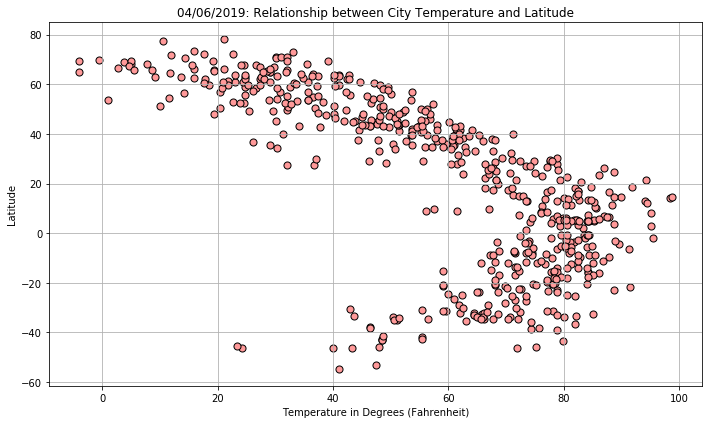

In [43]:
#scatter plot #1: Temperature vs Latitude
temp_v_lat = weather_df.plot(kind='scatter', x='Temp', y='Lat', s = 50,
                          marker="o", edgecolors='black', color='#ff9999', 
                          grid=True, figsize=(10,6))

temp_v_lat.set_xlabel("Temperature in Degrees (Fahrenheit)")
temp_v_lat.set_ylabel("Latitude")
temp_v_lat.set_title("04/06/2019: Relationship between City Temperature and Latitude")

plt.tight_layout()
plt.savefig("Images/temp_v_lat.jpg")
plt.show()

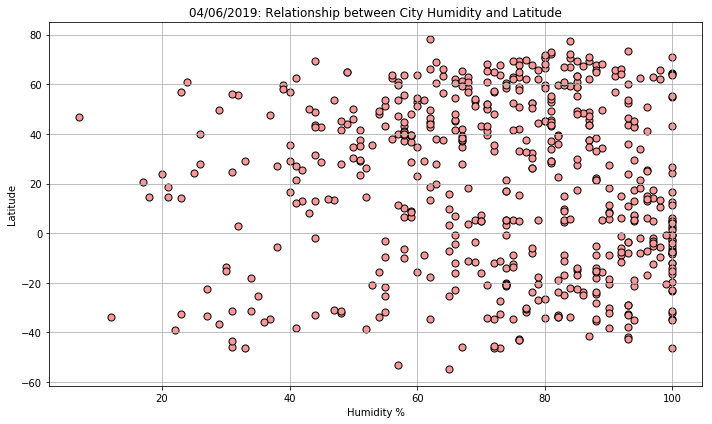

In [45]:
#scatter plot #2: Humidity vs Latitude
hum_v_lat = weather_df.plot(kind='scatter', x='Humidity %', y='Lat', s = 50,
                          marker="o", edgecolors='black', color='#ff9999', 
                          grid=True, figsize=(10,6))

hum_v_lat.set_xlabel("Humidity %")
hum_v_lat.set_ylabel("Latitude")
hum_v_lat.set_title("04/06/2019: Relationship between City Humidity and Latitude")

plt.tight_layout()
plt.savefig("Images/hum_v_lat.jpg")
plt.show()

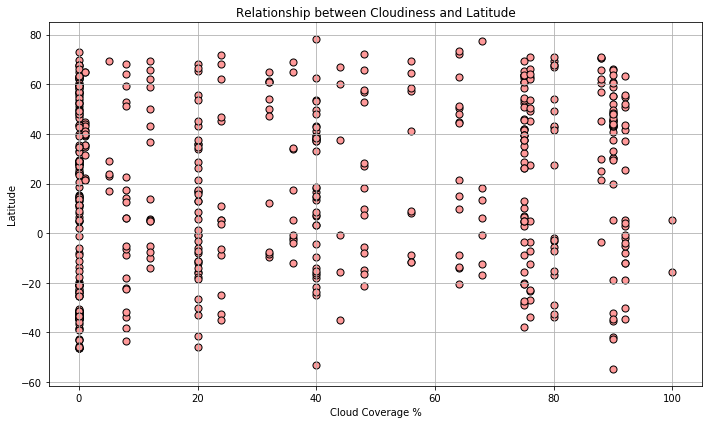

In [42]:
#scatter plot #3: Cloudiness vs Latitude
cloud_v_lat = weather_df.plot(kind='scatter', x='Cloud Coverage %', y='Lat', s = 50,
                          marker="o", edgecolors='black', color='#ff9999', 
                          grid=True, figsize=(10,6))

cloud_v_lat.set_xlabel("Cloud Coverage %")
cloud_v_lat.set_ylabel("Latitude")
cloud_v_lat.set_title("04/06/2019: Relationship between Cloudiness and Latitude")

plt.tight_layout()
plt.savefig("Images/cloud_v_lat.jpg")
plt.show()

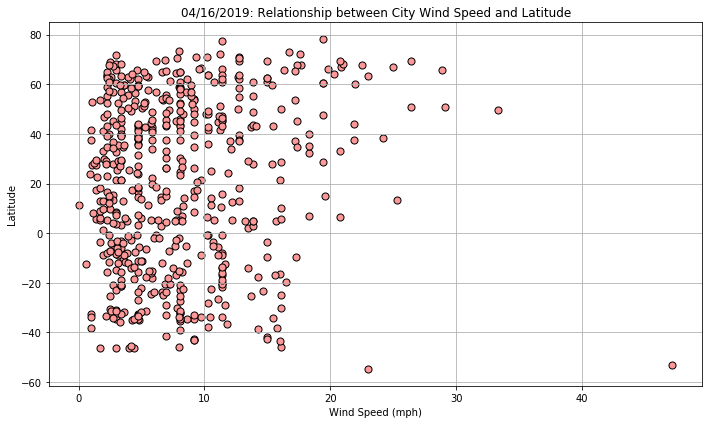

In [44]:
#scatter plot #4: Wind Speed vs Latitude
wind_v_lat = weather_df.plot(kind='scatter', x='Wind Speed', y='Lat', s = 50,
                          marker="o", edgecolors='black', color='#ff9999', 
                          grid=True, figsize=(10,6))

wind_v_lat.set_xlabel("Wind Speed (mph)")
wind_v_lat.set_ylabel("Latitude")
wind_v_lat.set_title("04/16/2019: Relationship between City Wind Speed and Latitude")

plt.tight_layout()
plt.savefig("Images/wind_v_lat.jpg")
plt.show()